In [48]:
import tensorflow.python.keras as k
from tensorflow.python.keras.preprocessing.image_dataset import image_dataset_from_directory
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications import vgg16

k.backend.set_floatx("posit160")
k.backend.floatx()
import os

In [49]:
path_to_zip = '/home/elisa/cppWorkspace/datasets/cats_and_dogs.zip'
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [13]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [41]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [42]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [43]:
BATCH_SIZE = 64
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180

In [50]:
train_dataset = image_dataset_from_directory(
    os.path.join(PATH, 'train'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False)

validation_dataset = image_dataset_from_directory(
    os.path.join(PATH, 'validation'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [51]:
train_dataset = train_dataset.take(200)
validation_dataset = validation_dataset.take(60)

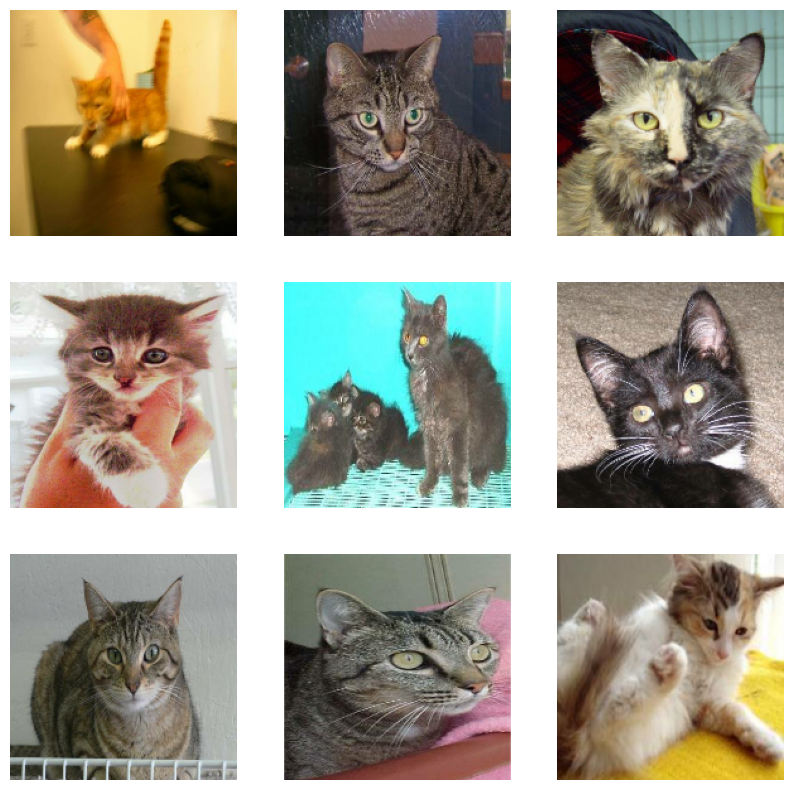

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [53]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch[1])

tf.Tensor(
[[[ 37.518517  44.518517  37.518517]
  [ 39.        45.        43.      ]
  [ 39.        44.333332  45.666664]
  ...
  [191.4254   191.86989  167.09221 ]
  [203.88889  203.88889  169.88889 ]
  [200.03705  197.7037   160.70374 ]]

 [[ 38.        45.        38.      ]
  [ 38.166668  44.166668  42.166668]
  [ 38.166668  43.5       44.833332]
  ...
  [189.9997   188.9997   165.6665  ]
  [199.33333  196.83333  165.33333 ]
  [196.94444  194.05556  159.2778  ]]

 [[ 36.481483  43.481483  36.481483]
  [ 35.22222   41.22222   39.22222 ]
  [ 34.037037  39.37037   40.703705]
  ...
  [185.31458  183.18501  162.42586 ]
  [195.22223  191.22223  163.      ]
  [202.90736  199.1296   165.96295 ]]

 ...

 [[ 26.777792  24.777792  25.777792]
  [ 23.222229  21.222229  22.222229]
  [ 20.555563  18.555563  19.555563]
  ...
  [ 50.925724  37.925724  30.703495]
  [ 44.888855  31.888855  24.666626]
  [ 43.64807   33.259186  25.425842]]

 [[ 30.444439  28.444439  29.444439]
  [ 25.833344  23.833344  

## Feature extraction

In [23]:
conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [25]:
import numpy as np

print('This is the number of trainable weights '
      'after freezing the conv base:', sum(np.prod(x.shape) for x in conv_base.trainable_weights))

# Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

This is the number of trainable weights after freezing the conv base: 14714688
0 input_1 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [26]:
conv_base.trainable = False

In [27]:
print('This is the number of trainable weights '
      'after freezing the conv base:', sum(np.prod(x.shape) for x in conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [28]:
data_augmentation = k.models.Sequential([
    k.layers.RandomFlip("horizontal"),
    k.layers.RandomRotation(0.1),
    k.layers.RandomZoom(0.2),
])

In [29]:
inputs = k.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
# x = data_augmentation(inputs)
x = vgg16.preprocess_input(inputs)
x = conv_base(x)
x = k.layers.Flatten()(x)
x = k.layers.Dense(256)(x)
x = k.layers.Dropout(0.5)(x)
outputs = k.layers.Dense(1, activation="sigmoid")(x)

model = k.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 180, 180, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3277056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

In [37]:
history = model.fit(
    train_dataset,
    epochs=5, # 50 epochs take approximately 15 minutes
    validation_data=validation_dataset
)

Epoch 1/5


2023-06-28 21:44:08.867926: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 265420800 exceeds 10% of free system memory.
2023-06-28 21:44:58.870544: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 265420800 exceeds 10% of free system memory.


 1/32 [..............................] - ETA: 27:58:48 - loss: 0.6929 - accuracy: 0.4844

2023-06-28 22:38:14.892843: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 265420800 exceeds 10% of free system memory.
2023-06-28 22:38:46.626375: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 265420800 exceeds 10% of free system memory.


 2/32 [>.............................] - ETA: 27:02:07 - loss: 0.6924 - accuracy: 0.5078

2023-06-28 23:32:19.104661: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 265420800 exceeds 10% of free system memory.


12/32 [==========>...................] - ETA: 17:45:12 - loss: 0.6887 - accuracy: 0.4895

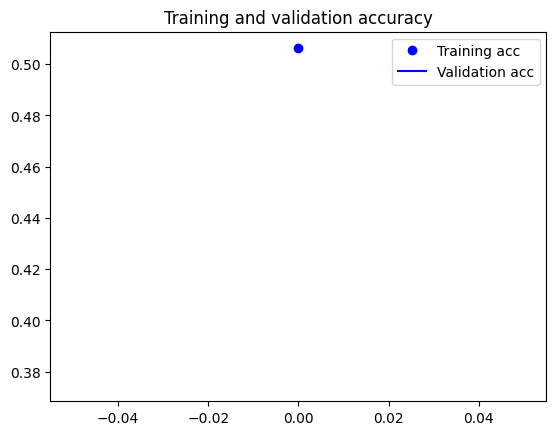

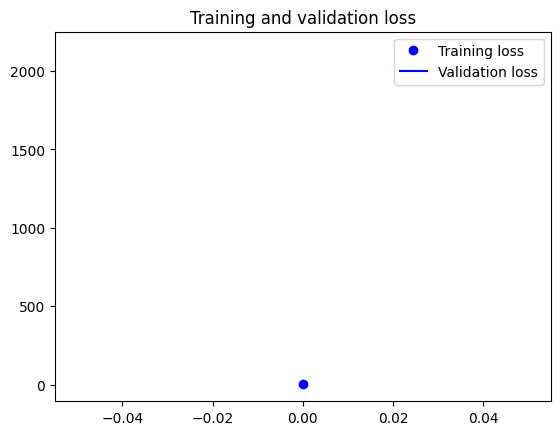

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fine tuning

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
from tensorflow.python.keras.optimizers import rmsprop_v2

model.compile(loss="binary_crossentropy",
              optimizer=rmsprop_v2.RMSProp(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf.__operators__.getitem_5 ( (None, 32, 32, 3)         0         
_________________________________________________________________
tf.nn.bias_add_5 (TFOpLambda (None, 32, 32, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0   

In [ ]:
history = model.fit(
    train_dataset,
    epochs=5, # 30 epochs take approximately 10 minutes
    validation_data=validation_dataset)

10/10 [==============================] - 546s 55s/step - loss: 0.6917 - accuracy: 0.4937 - val_loss: 1472.0000 - val_accuracy: 0.5625


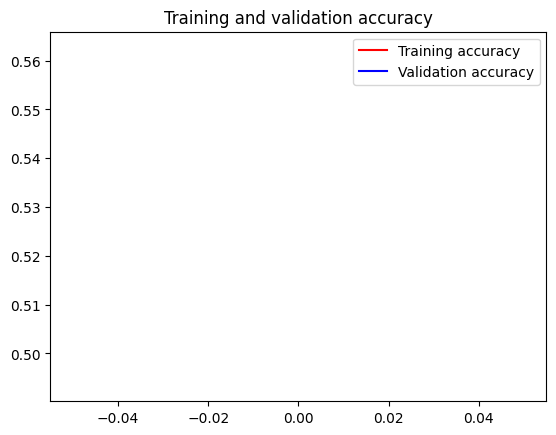

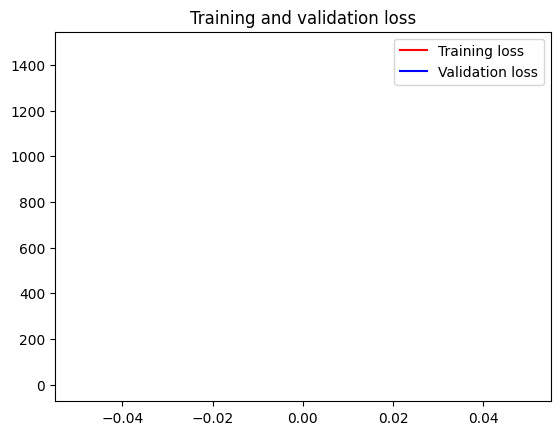

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()